

<font color=red size=6><b>자본자산가격결정모형(CAPM:Capital asset pricing model)</b>
* 기업의 가치를 계산하거나 자산에 대한 투자 결정을 보조할 때에 가장 많이 사용되는 재무 모델. 
    * 1950년 H. M. Markowitz[2]가 창안한 현대 포트폴리오 이론(Modern Portfolio Theory)을 기반으로 하는 재무가치 평가 모델
    * 자본시장이 균형상태(시장에서 수요와 공급이 일치되도록 가격이 형성된 상태)에 있을 때, (자본)자산의 균형가격이 위험을 반영하여 어떻게 결정되는지를 보여주는 모형
        * 위험-수익의 상충관계가 완벽하게 성립(소위 "High Risk, High Return")하는 시장에서는 각 자산은 그에 투자하기에 딱 정확한 만큼의 리스크로 가격 산정
        * 즉, 일정한 가정 하에서, 시장이 자율적으로 리스크-리턴의 균형을 맞추고 각 자산의 최적 가격을 결정

    * 현재의 소득을 미래로 가져가는 방법 : 무위험자산에 대한 투자 , 위험자산에 대한 투자 두 가지를 가정
----
* <b>위험자산 == 전체 포트폴리오</b>
    * 위험,수익률 고려해 가장 효율적인 포트폴리오가 존재한다
    * 개별기업에 적용할 경우 위험-수익의 관계 베타(β)를 알 수 있다
* <b>CAPM == 개별 주식
    * 개별 주식 가격이 그 포트폴리오에 대하여 어떻게 움직이는가?
    * 개별주식수익이 시장 전체 수익에 대하여 어떻게 변동하는가?
----    
* 단점
    *  금융시장은 세금 등이 없는 완전자본시장이며, 모든 투자자들은 합리적이고 동질적 기대를 하고 있으며 위험회피적 성향이라는 등의 가정
    *  시장 포트폴리오의 사전·사후수익률이 정규분포를 따라야 하며, 위험회피자들의 효용함수가 2차(U=√W) 이상의 위험회피도를 보이고, 투자자 간 정보 비대칭이 없으며, 자본시장이 준강형 효율적 시장가설(EMH) 만족 등
* ref : https://namu.wiki/w/자본자산가격결정모형


* <font color=red><b>베타</b></font>    
    * 개별 주식이 전체 주식시장의 변동에 반응하는 정도를 나타낸 값
        * 예) 베타 1.5 : 주식시장이 수익률이 +1%일 때 개별 주식의 수익률은 +1.5% 
        * 예) 베타 0.5 : 주식시장 수익률의 절반
    * 베타가 큰 주식은 주식시장보다 수익률의 움직임이 크다(수익이 크다) == 변동성이 크다 
    * 상승장 예상 시 베타가 큰 주식에 투자<p>
* <font color=red>회귀 분석 모형 : $ 회귀분석모형:\ y = a + bx $    
* <font color=red>자산가격결정모형: $ R_i = R_f + \beta_i \times [R_m - R_f] $
| 구분 | 회귀분석모형 | 자산가격결정모형 | 
| --- | --- | --- |
| 상수항 | $a$ | $R_f$ (무위험수익률) |
| 독립변수 | $x$ | $R_m - R_f$ (시장위험 프리미엄) |
| 종속변수 | $y$ | $R_i$ (개별주식의 수익률) |
| 회귀계수 | $b$ | $\beta_i$ (개별주식의 베타(기울기)) |    

- 팩터 : 포트폴리오의 수익률에 영향을 미치는 공통적인 요인
- 팩터의 요건
    - 

# Data Load

In [1]:
# ! pip install yfinance

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels import regression
import yfinance as yf

# Define the symbols
symbols = ['005930.KS', '015760.KS', '069500.KS']


df = pd.DataFrame()
for symbol in symbols:
    data = yf.download(symbol, start='2016-01-01', end='2017-12-31')['Close']
    df = pd.concat([df, data], axis=1)
df.columns = symbols

# Calculate returns
ret = df.pct_change()[1:]
ret_sub = ret.loc[pd.to_datetime('2016-01-01'):pd.to_datetime('2017-12-31')]

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


005930.KS  015760.KS  069500.KS
2016-01-04 00:00:00    24100.0    50000.0    23850.0
2016-01-05 00:00:00    24160.0    50700.0    24000.0
2016-01-06 00:00:00    23500.0    50800.0    23825.0
2016-01-07 00:00:00    23260.0    50300.0    23600.0
2016-01-08 00:00:00    23420.0    49900.0    23765.0

# 공통함수

In [11]:
def my_chart(x, y, xlabel='KOSPI 200', ylabel='Individual Stock'):
    # y = np.array(ret_sub[symbols[0]])
    # x = np.array(ret_sub[symbols[2]])
    X = sm.add_constant(x)
    reg = regression.linear_model.OLS(y, X).fit()
    print(reg.summary())
    print(reg.params[1])
    plt.scatter(x, y, marker='.', alpha=0.3)
    plt.xlim((-0.02, 0.02))
    plt.ylim((-0.02, 0.02))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.plot(x, reg.params[0] + reg.params[1]*x, 'r')
    plt.plot(x, x, 'k--')
    plt.show()


# 베타 

In [3]:
import yfinance as yf
import pandas as pd

tickers = ['^KS11', '039490.KS'] 

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker,
                                   start="2016-01-01",
                                   end='2021-12-31') 
    
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
ret = prices.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


* <font color=red><b>종속변수: 증권주 수익률
* <font color=red><b>독립변수 :  KOSPI 지수 수익률

In [4]:
import statsmodels.api as sm

ret['intercept'] = 1 # 개별자산 ,       시장 
reg = sm.OLS(ret[['039490.KS']], ret[['^KS11', 'intercept']]).fit()

In [5]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              039490.KS   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     860.1
Date:                Tue, 23 May 2023   Prob (F-statistic):          3.07e-149
Time:                        09:18:10   Log-Likelihood:                 3691.2
No. Observations:                1472   AIC:                            -7378.
Df Residuals:                    1470   BIC:                            -7368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^KS11          1.4333      0.049     29.328      0.000       1.337       1.529
intercept      0.0002      0.001      0.376      0.707      -0.001       0.001
==============================================================================
Omnibus:                      223.609   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.755
Skew:                           0.812   Prob(JB):                    8.64e-129
Kurtosis:                       5.642   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=red> <b>베타 == coef :  베타값이 약 1.43 증권주의 특성인 고베타주임이 확인
* 코스피 대비 1.43의 수익을 내고 있다

# OLS Report

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     419.0
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.51e-67
Time:                        15:08:42   Log-Likelihood:                 1471.6
No. Observations:                 486   AIC:                            -2939.
Df Residuals:                     484   BIC:                            -2931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      1.195      0.2

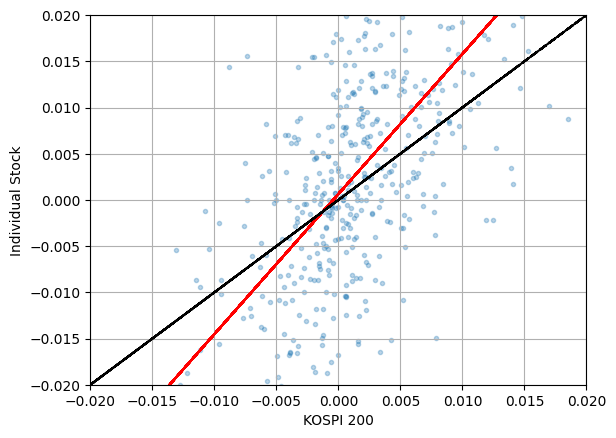

In [12]:
y = np.array(ret_sub[symbols[0]])
x = np.array(ret_sub[symbols[2]])
my_chart(x, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.13
Date:                Fri, 21 Apr 2023   Prob (F-statistic):            0.00155
Time:                        15:09:03   Log-Likelihood:                 1371.1
No. Observations:                 486   AIC:                            -2738.
Df Residuals:                     484   BIC:                            -2730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.985      0.3

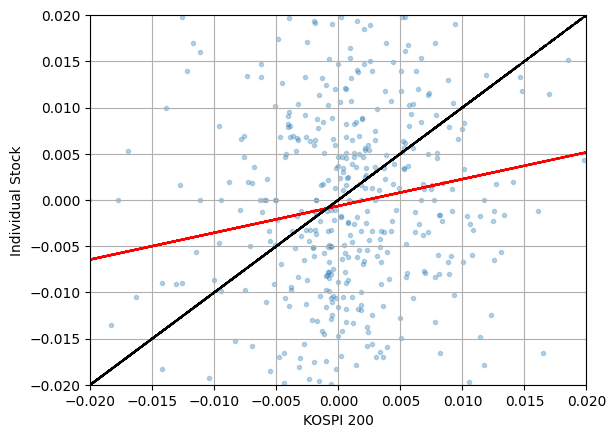

In [13]:
y = np.array(ret_sub[symbols[1]])
x = np.array(ret_sub[symbols[2]])
my_chart(x, y)


In [14]:
# CAPM Beta   # 개별df , 마켓지수df
def CAPM_beta(stock_ret, market_ret):
    X = sm.add_constant(market_ret)
    model = regression.linear_model.OLS(stock_ret, X).fit()
    beta = model.params[1] # coef
    return beta

beta_samsung = CAPM_beta(ret_sub[symbols[0]], ret_sub[symbols[2]])
beta_utility = CAPM_beta(ret_sub[symbols[1]], ret_sub[symbols[2]])
print(beta_samsung) # 기울기 크다 == 수익률 높음
print(beta_utility) # 기울기 완만 == 수익률 낮다

1.5160048423488353
0.2899264933174469


# R

<pre>
----------------------------------
<b>* Windows10 R 설치</b>
----------------------------------
* https://cran.r-project.org/   
"Download R for Windows" -> Download R-4.2.3 for Windows.exe 


----------------------------------
<b>* 환경변수 path 등록</b>
----------------------------------
C:\Program Files\R\R-4.2.3\bin
C:\AI\pythonProject\venv\Lib\site-packages\jupyter_client
C:\AI\pythonProject\venv\Scripts    
    
----------------------------------
<b>*cmd에서 R 커널 실행 </b>
    이하 아래 명령들 설치 진행 예정
    # install.package('devtools')
    # devtools::install_github('IRkernel/IRkernel')
    # IRkernel::installspec()
----------------------------------
C:\Users\ASIA> R  


----------------------------------
<b>* R커널에서 IRkernel 설치
    > install.packages('IRkernel')</b>
----------------------------------
    다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
    C:\Users\ASIA\AppData\Local\Temp\Rtmp8e8GHo\downloaded_packages
    
    install.packages("IRkernel")에서 경고가 발생했습니다 : 
  'lib = "C:/Program Files/R/R-4.2.3/library"'는 기록이 가능하지 않습니다
    --- 현재 세션에서 사용할 CRAN 미러를 선택해 주세요 ---
    ‘rlang’, ‘fastmap’, ‘ellipsis’, ‘cli’, ‘fansi’, ‘glue’, ‘lifecycle’, ‘utf8’, ‘vctrs’, ‘htmltools’, ‘pillar’, ‘base64enc’, ‘repr’, ‘evaluate’, ‘IRdisplay’, ‘pbdZMQ’, ‘crayon’, ‘jsonlite’, ‘uuid’, ‘digest’(들)을 또한 설치합니다.

----------------------------------
<b>* R커널에서 devtool 설치
    > install.packages('devtools')</b>
----------------------------------
    ‘C:/Users/ASIA/AppData/Local/R/win-library/4.2’의 위치에 패키지(들)을 설치합니다.
    다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
    C:\Users\ASIA\AppData\Local\Temp\Rtmp8e8GHo\downloaded_packages

----------------------------------    
<b>* R커널에서 커널 외부사용 등록
    > devtools::install_github('IRkernel/IRkernel')
    > IRkernel::installspec(user = FALSE)  </b>  
----------------------------------




In [ ]:
library(quantmod)
library(PerformanceAnalytics)
library(magrittr)

symbols = c("005930.KS", "015760.KS", "069500.KS")
getSymbols(symbols)
prices = do.call(cbind, lapply(symbols, function(x) Cl(get(x))))

ret = Return.calculate(prices)
ret.sub = ret["2016-01::2017-12"] 
# ret.sub = ret["2016::2017"] 

# 삼성전자
y = ret.sub[, 1] %>% as.numeric()
x = ret.sub[, 3] %>% as.numeric()

reg = lm(y ~ x)
summary(reg)
reg$coefficients
reg$coefficients[2]

plot(x, y, pch = 4, cex = 0.3, 
     xlab = "KOSPI 200", ylab = "Individual Stock",
     xlim = c(-0.02, 0.02), ylim = c(-0.02, 0.02))
grid()
abline(a = 0, b = 1, lty = 2)
abline(reg, col = 'red')

CAPM.beta(ret.sub[, 1], ret.sub[, 3]) # Using Function

# 유틸리티주
y = ret.sub[, 2] %>% as.numeric()
x = ret.sub[, 3] %>% as.numeric()

reg = lm(y ~ x)
summary(reg)
reg$coefficients
reg$coefficients[2]

plot(x, y, pch = 4, cex = 0.3, 
     xlab = "KOSPI 200", ylab = "Individual Stock",
     xlim = c(-0.02, 0.02), ylim = c(-0.02, 0.02))
grid()
abline(a = 0, b = 1, lty = 2)
abline(reg, col = 'red')

CAPM.beta(ret.sub[, 2], ret.sub[, 3]) # Using Function